In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import warnings
import matplotlib.pyplot as plt
 
warnings.filterwarnings('ignore')

In [2]:
features = pd.read_csv('spx_cons_norm.csv')
features = features[['tic','datadate','industry_id','forward_excess_ret','ROE','Asset Turnover','EMA6','earningsVol','PS','ev_ebitda']]
industry_dummy = pd.get_dummies(features['industry_id'])
features = pd.merge(features,industry_dummy,how='left',left_index=True,right_index=True)

features = features.dropna(subset=['forward_excess_ret'])
features_after = features.groupby(['tic']).ffill()
features_after = pd.merge(features_after,features[['tic']],how='left',left_index=True,right_index=True)

cols = [col for col in features_after.columns if col not in ['datadate','industry_id','forward_excess_ret','tic']]
df_na = features_after.isnull()

df_mean = features_after.groupby('tic').mean()




for col in cols:
    na_series = features_after[col].isnull()
    names = list(features_after.loc[na_series,'tic'])     

    t = df_mean.loc[names,col]
    t.index = features_after.loc[na_series,col].index

    
    features_after.loc[na_series,col] = t



for col in cols:
    na_series = features_after[col].isnull()
    mean = np.mean(features_after[col]) 
    features_after.loc[na_series,col] = mean

 

In [3]:
X = features_after[['ROE','Asset Turnover','EMA6','earningsVol','PS','ev_ebitda',10,15,20,25,30,35,40,45,50,55,60]]
#X = sm.add_constant(X)
Y = features_after[['forward_excess_ret']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=52)

In [4]:
#Linear
reg = LassoCV(cv=5,fit_intercept=True,alphas=np.linspace(0.00001,0.001,100)).fit(X_train,y_train)   
print(reg.alphas_)
print(reg.coef_)
print(reg.intercept_)

[1.0e-03 9.9e-04 9.8e-04 9.7e-04 9.6e-04 9.5e-04 9.4e-04 9.3e-04 9.2e-04
 9.1e-04 9.0e-04 8.9e-04 8.8e-04 8.7e-04 8.6e-04 8.5e-04 8.4e-04 8.3e-04
 8.2e-04 8.1e-04 8.0e-04 7.9e-04 7.8e-04 7.7e-04 7.6e-04 7.5e-04 7.4e-04
 7.3e-04 7.2e-04 7.1e-04 7.0e-04 6.9e-04 6.8e-04 6.7e-04 6.6e-04 6.5e-04
 6.4e-04 6.3e-04 6.2e-04 6.1e-04 6.0e-04 5.9e-04 5.8e-04 5.7e-04 5.6e-04
 5.5e-04 5.4e-04 5.3e-04 5.2e-04 5.1e-04 5.0e-04 4.9e-04 4.8e-04 4.7e-04
 4.6e-04 4.5e-04 4.4e-04 4.3e-04 4.2e-04 4.1e-04 4.0e-04 3.9e-04 3.8e-04
 3.7e-04 3.6e-04 3.5e-04 3.4e-04 3.3e-04 3.2e-04 3.1e-04 3.0e-04 2.9e-04
 2.8e-04 2.7e-04 2.6e-04 2.5e-04 2.4e-04 2.3e-04 2.2e-04 2.1e-04 2.0e-04
 1.9e-04 1.8e-04 1.7e-04 1.6e-04 1.5e-04 1.4e-04 1.3e-04 1.2e-04 1.1e-04
 1.0e-04 9.0e-05 8.0e-05 7.0e-05 6.0e-05 5.0e-05 4.0e-05 3.0e-05 2.0e-05
 1.0e-05]
[ 0.02598442  0.01301883 -0.00575027 -0.03257139 -0.04730033  0.08012465
 -0.60203502 -0.          0.09350115 -0.10179287  0.0177239   0.13037815
 -0.00424412  0.16954344  0.00138106 -0.1

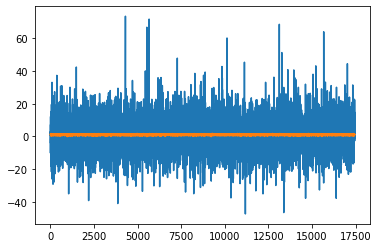

In [5]:
reg = linear_model.Lasso(alpha=0.001)
reg.fit(X_train,y_train)
linear_predict=reg.predict(X_test)
plt.plot(range(17457),y_test)
plt.plot(range(17457),linear_predict)

In [16]:
#KNN

for n in [2,3,4,5,6,7,8]:
    neigh = KNeighborsRegressor(n_neighbors=n)
    #neigh.fit(X_train,y_train)
    scores = cross_val_score(neigh, X_train,y_train, cv=5)
    print(n,np.mean(scores))

2 -0.5010384204757524
3 -0.33243379791066985
4 -0.2514948538341467
5 -0.1999391095261529
6 -0.1629049773254724
7 -0.137542936655489
8 -0.12355743937633394


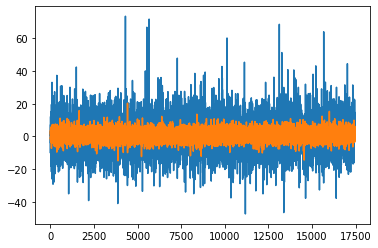

In [37]:
neigh = KNeighborsRegressor(n_neighbors=8)
knn_predict = neigh.fit(X_train,y_train).predict(X_test)
plt.plot(range(17457),y_test)
plt.plot(range(17457),knn_predict)

In [6]:
#random forest

for max_depth in [2,3,4,5,6,7]:
    regr = RandomForestRegressor(max_depth=max_depth, random_state=0)
    scores = cross_val_score(regr, X_train,y_train, cv=5)
    print(max_depth,np.mean(scores))

2 -0.0008640087858114099
3 -0.001115361124667902
4 -0.001513577498287466
5 -0.0017461525406849755
6 -0.0026166156564013665
7 -0.0034032223932203287


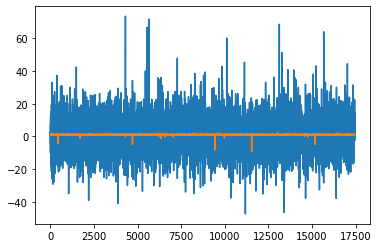

In [7]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
fm_predict = regr.fit(X_train,y_train).predict(X_test)
plt.plot(range(17457),y_test)
plt.plot(range(17457),fm_predict)